Downloading the dataset from OAS database. For a single file, you can directly use wget. If there are multiple files, you can write a script that has multiple wgets. OAS website will also provide a script if your search returns multiple data units.

In [1]:
!wget https://opig.stats.ox.ac.uk/webapps/ngsdb/unpaired/Gupta_2017/csv/SRR4431787_1_Heavy_IGHG.csv.gz

--2024-11-25 11:24:54--  https://opig.stats.ox.ac.uk/webapps/ngsdb/unpaired/Gupta_2017/csv/SRR4431787_1_Heavy_IGHG.csv.gz
Resolving opig.stats.ox.ac.uk (opig.stats.ox.ac.uk)... 163.1.32.59
Connecting to opig.stats.ox.ac.uk (opig.stats.ox.ac.uk)|163.1.32.59|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11080112 (11M) [application/x-gzip]
Saving to: 'SRR4431787_1_Heavy_IGHG.csv.gz'

     0K .......... .......... .......... .......... ..........  0% 22.2K 8m5s
    50K .......... .......... .......... .......... ..........  0% 59.2K 5m32s
   100K .......... .......... .......... .......... ..........  1% 44.9K 5m0s
   150K .......... .......... .......... .......... ..........  1% 33.7K 5m2s
   200K .......... .......... .......... .......... ..........  2%  102K 4m22s
   250K .......... .......... .......... .......... ..........  2%  154K 3m48s
   300K .......... .......... .......... .......... ..........  3%  103K 3m29s
   350K .......... .......... ........

One of the differences between paired and unpaired data unit files is the name of some of the columns. It is CRITICAL to make sure that the column name matches to those provided as inputs to some of the OAS_wrapper functions. NOTE: Because of the differences, we provide this jupyter note book for unpaired data analysis.

In [3]:
import pandas as pd
import OAS_wrapper

The file has metadata parameters in the first line followed by a table format of sequence related information. The below script separates metadata, print the metadata information.


In [4]:
data_unit_file = "SRR4431787_1_Heavy_IGHG.csv.gz"

# Extract metadata and sequences
metadata, sequences = OAS_wrapper.extract_metadata_and_sequences(data_unit_file)

print("Metadata:")
print(metadata)

Metadata:
{'Run': 'SRR4431787', 'Link': 'https://doi.org/10.4049/jimmunol.1601850', 'Author': 'Gupta et al., 2017', 'Species': 'human', 'BSource': 'PBMC', 'BType': 'Naive-B-Cells', 'Longitudinal': 'Before-Hour-1', 'Subject': 'Subject-FV', 'Vaccine': 'Flu', 'Disease': 'None', 'Age': '30', 'Chain': 'Heavy', 'Unique sequences': 19138, 'Total sequences': 35119, 'Isotype': 'IGHG'}


Exploring the columns present in the downloaded dataset for downstream analysis.
Information rich table that has 97 columns (for unpaired datasets). Paired datasets generally have many columns when compared to unpaired datasets (198 columns for the sample paired dataset as shown in other Paired_tutorial).

In [5]:
sequences.head(n=1)


,sequence,locus,stop_codon,vj_in_frame,v_frameshift,productive,rev_comp,complete_vdj,v_call,d_call,...,cdr3_start,cdr3_end,np1,np1_length,np2,np2_length,c_region,Redundancy,ANARCI_numbering,ANARCI_status
0,CTATTATATAAACTCTAATACGGGGAGCTCTGAGAGCGGAGCCCCA...,H,F,T,F,T,T,T,IGHV3-72*01,IGHD1-14*01,...,458.0,502.0,GGGCGAGACGGGTCCATC,18.0,CTGGTCGAAA,10.0,CCTCCACCAAGGGCCCATCGGTCTTCCCCCTGG,144,"{'fwh1': {'1 ': 'E', '2 ': 'V', '3 ': 'R', '4 ...","|Deletions: 10, 73||||"


For a subset of the above columns that are strings (i.e., sequence, germline, V, D, J etc), total and unique number of such strings can be identified, along with plotting the distributions for easy comparison.
NOTE: The difference in the column names is evident in the below code snippet. For paired datasets, we use _heavy columns, but those are not explicitly mentioned in unpaired datasets, as the dataset can be either heavy or light.

In [8]:
summary_table = OAS_wrapper.column_summary(data_unit_file, ["sequence", "v_sequence_alignment", "germline_alignment"])
print(summary_table)

            Column Name  Total Count  Unique Count
0              sequence        19138         19138
1  v_sequence_alignment        19138         18021
2    germline_alignment        19138          5179


From the above table, it is clear that the number of unique germline is less than the unique sequences, highlighting that a single germline can be the origin of multiple sequences. In addition, the number of unique variable sequences is significantly less as expected.

Below, we show the distributions of lengths of these different fields:

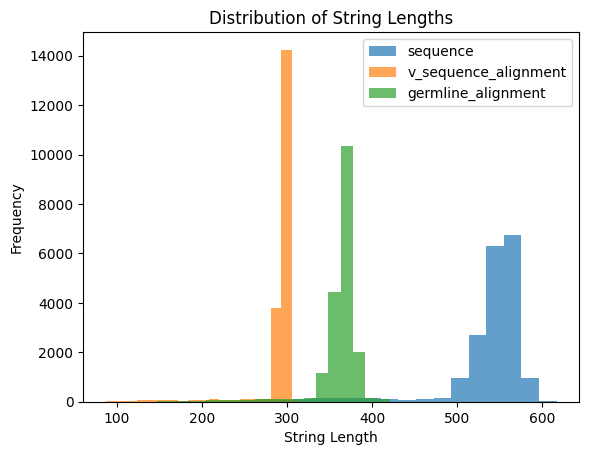

In [9]:
OAS_wrapper.plot_string_length_distribution(data_unit_file, ["sequence", "v_sequence_alignment", "germline_alignment"])


The Variable, Diversity and Junction (VDJ) regions of a particular sequence are annotated with the identifier that is obtained from IMGT reference database (as shown below).

In [10]:
sequences[["v_call", "d_call", "j_call"]]

,v_call,d_call,j_call
0,IGHV3-72*01,IGHD1-14*01,IGHJ4*02
1,IGHV3-7*01,IGHD2-15*01,IGHJ4*02
2,IGHV4-39*01,IGHD1/OR15-1a*01,IGHJ5*02
3,IGHV3-30*18,IGHD1-7*01,IGHJ4*02
4,IGHV1-2*06,IGHD1-1*01,IGHJ5*02
...,...,...,...
19133,IGHV3-30*18,IGHD1-7*01,IGHJ5*01
19134,IGHV3-30*18,IGHD1-7*01,IGHJ5*02
19135,IGHV4-34*02,IGHD2-8*02,IGHJ3*02
19136,IGHV1-69*01,IGHD2-21*02,IGHJ4*02


If a user is interested to map the identifier to the actual sequences, below script can be used:

In [11]:
# Retrieve the original sequences first
v_sequences_db_path = "../refs/imgt_human_IGHV_sequences.txt"
d_sequences_db_path = "../refs/imgt_human_IGHD_sequences.txt"
j_sequences_db_path = "../refs/imgt_human_IGHJ_sequences.txt"

In [ ]:
#A sample sequence that we will use for downstream analysis
sequences["sequence"].iloc[0]

'CTATTATATAAACTCTAATACGGGGAGCTCTGAGAGCGGAGCCCCAGCCCCAGAATTCCCAGGTGTTTTCATTTGGTGATCAGCACTGAACACAGAGGACTCACCATGGAGTTTGGGCTGAGCTGGGTTTTTCCTTGTTGTTATTTTACAAGGTGTCCACTGTGAAGTGCGACTGGTGGAGTCTGGGGGAGGCTTGGTCCAGCCTGGAGGGTCACTGAGACTCTCCTGTGTGGTCTCTGGATTCACCTTCAGTGAGCACTATATGGACTGGATCCGCCAGGCTCCAGGGAAGGGGCTGGAGTGGGTTGGCCGTATTAGAAACAAAGCAAACAGTTACACCACAGAATATGCCGCATCTGTGAAAGACAGATTCACCATCACAAGAGACGATTCAAAGGATTCACTCTATCTGCAAATGAACAGCCTGAATAACGGAGACACGGCCGTCTATTATTGTTCTAGGGGCGAGACGGGTCCATCACCACCTGGTCGAAATGACTGCTGGGGCCAGGGAACCCTGGTCACCGTCTCCTCAGCCTCCACCAAGGGCCCATCGGTCTTCCCCCTGG'

In [ ]:
# Assuming you have loaded your DataFrame and sequences DataFrames (df, v_sequences_df, d_sequences_df, j_sequences_df)
query_sequence = 'CTATTATATAAACTCTAATACGGGGAGCTCTGAGAGCGGAGCCCCAGCCCCAGAATTCCCAGGTGTTTTCATTTGGTGATCAGCACTGAACACAGAGGACTCACCATGGAGTTTGGGCTGAGCTGGGTTTTTCCTTGTTGTTATTTTACAAGGTGTCCACTGTGAAGTGCGACTGGTGGAGTCTGGGGGAGGCTTGGTCCAGCCTGGAGGGTCACTGAGACTCTCCTGTGTGGTCTCTGGATTCACCTTCAGTGAGCACTATATGGACTGGATCCGCCAGGCTCCAGGGAAGGGGCTGGAGTGGGTTGGCCGTATTAGAAACAAAGCAAACAGTTACACCACAGAATATGCCGCATCTGTGAAAGACAGATTCACCATCACAAGAGACGATTCAAAGGATTCACTCTATCTGCAAATGAACAGCCTGAATAACGGAGACACGGCCGTCTATTATTGTTCTAGGGGCGAGACGGGTCCATCACCACCTGGTCGAAATGACTGCTGGGGCCAGGGAACCCTGGTCACCGTCTCCTCAGCCTCCACCAAGGGCCCATCGGTCTTCCCCCTGG'
v_sequences_df = pd.read_csv(v_sequences_db_path, names=("v_call", "sequence"), header=None, sep="\t")
d_sequences_df = pd.read_csv(d_sequences_db_path, names=("d_call", "sequence"), header=None, sep="\t")
j_sequences_df = pd.read_csv(j_sequences_db_path, names=("j_call", "sequence"), header=None, sep="\t")
result = OAS_wrapper.tabulate_query_sequence(query_sequence, data_unit_file, v_sequences_df, d_sequences_df, j_sequences_df)
print(result)

{'sequence_heavy': 'AGCTCTGAGAGAGGAGCCCAGCCCTGGGATTTTCAGGTGTTTTCATTTGGTGATCAGGACTGAACAGAGAGAACTCACCATGGAGTTTGGGCTGAGCTGGCTTTTTCTTGTGGCTATTTTAAAAGGTGTCCAGTGTGAGGTGCAGCTGTTGGAGTCTGGGGGAGGCTTAGTACAGCCTGGGGGGTCCCTGAGACTCTCCTGTGTAGCCTCTGGATTCACCTTTAGCAGCTATGCCATGAGCTGGGTCCGCCAGGCTCCAGGGAAGGGGCTGGAGTGGGTCTCAGGTATTAGTGCTAGTGGTGCTAGCACATACTACGCAGACTCCGTGAAGGGCCGGTTCACCATCTCCAGAGACAATTCCAAGAACACGCTGTATCTGCAAATGAACAGCCTGAGAGCCGAGGACACGGCCGTATATTACTGTGCGAAAACCCCCAAATACGATGTTTGGAGTGGTTATTATACGTCCAATGCCTTTGATATCTGGGGCCAAGGGACAATGGTCACCGTCTCTTCAGGGAGTGCATCCGCCCCAACCCTTTTCCCCCTCGTCTCCTGTGAGAATTCCCCGTCGGATACGAGCAGCGTG', 'v_call': 'IGHV3-23*01', 'v_sequence': 'gaggtgcagctgttggagtctggggga...ggcttggtacagcctggggggtccctgagactctcctgtgcagcctctggattcaccttt............agcagctatgccatgagctgggtccgccaggctccagggaaggggctggagtgggtctcagctattagtggtagt......ggtggtagcacatactacgcagactccgtgaag...ggccggttcaccatctccagagacaattccaagaacacgctgtatctgcaaatgaacagcctgagagccgaggacacggccgtatattactgtgcgaaaga', 'd_call': 'IGHD3-3*01', '

Aligning sequence and germline to identify the differences:

In [10]:
query_sequence = 'AGCTCTGAGAGAGGAGCCCAGCCCTGGGATTTTCAGGTGTTTTCATTTGGTGATCAGGACTGAACAGAGAGAACTCACCATGGAGTTTGGGCTGAGCTGGCTTTTTCTTGTGGCTATTTTAAAAGGTGTCCAGTGTGAGGTGCAGCTGTTGGAGTCTGGGGGAGGCTTAGTACAGCCTGGGGGGTCCCTGAGACTCTCCTGTGTAGCCTCTGGATTCACCTTTAGCAGCTATGCCATGAGCTGGGTCCGCCAGGCTCCAGGGAAGGGGCTGGAGTGGGTCTCAGGTATTAGTGCTAGTGGTGCTAGCACATACTACGCAGACTCCGTGAAGGGCCGGTTCACCATCTCCAGAGACAATTCCAAGAACACGCTGTATCTGCAAATGAACAGCCTGAGAGCCGAGGACACGGCCGTATATTACTGTGCGAAAACCCCCAAATACGATGTTTGGAGTGGTTATTATACGTCCAATGCCTTTGATATCTGGGGCCAAGGGACAATGGTCACCGTCTCTTCAGGGAGTGCATCCGCCCCAACCCTTTTCCCCCTCGTCTCCTGTGAGAATTCCCCGTCGGATACGAGCAGCGTG'
OAS_wrapper.align_and_compare_with_annotations(data_unit_file, "sequence_alignment_heavy", "germline_alignment_heavy", "sequence_heavy", query_sequence)

Row 2:
Original Sequence 1: GAGGTGCAGCTGTTGGAGTCTGGGGGAGGCTTAGTACAGCCTGGGGGGTCCCTGAGACTCTCCTGTGTAGCCTCTGGATTCACCTTTAGCAGCTATGCCATGAGCTGGGTCCGCCAGGCTCCAGGGAAGGGGCTGGAGTGGGTCTCAGGTATTAGTGCTAGTGGTGCTAGCACATACTACGCAGACTCCGTGAAGGGCCGGTTCACCATCTCCAGAGACAATTCCAAGAACACGCTGTATCTGCAAATGAACAGCCTGAGAGCCGAGGACACGGCCGTATATTACTGTGCGAAAACCCCCAAATACGATGTTTGGAGTGGTTATTATACGTCCAATGCCTTTGATATCTGGGGCCAAGGGACAATGGTCACCGTCTCTTCAG
Original Sequence 2: GAGGTGCAGCTGTTGGAGTCTGGGGGAGGCTTGGTACAGCCTGGGGGGTCCCTGAGACTCTCCTGTGCAGCCTCTGGATTCACCTTTAGCAGCTATGCCATGAGCTGGGTCCGCCAGGCTCCAGGGAAGGGGCTGGAGTGGGTCTCAGCTATTAGTGGTAGTGGTGGTAGCACATACTACGCAGACTCCGTGAAGGGCCGGTTCACCATCTCCAGAGACAATTCCAAGAACACGCTGTATCTGCAAATGAACAGCCTGAGAGCCGAGGACACGGCCGTATATTACTGTGCGAAANNNNNNNNNTACGATTTTTGGAGTGGTTATTATACNNNNNATGCTTTTGATATCTGGGGCCAAGGGACAATGGTCACCGTCTCTTCAG
Aligned and Highlighted Differences:
GAGGTGCAGCTGTTGGAGTCTGGGGGAGGCTTAGTACAGCCTGGGGGGTCCCTGAGACTCTCCTGTGTAGCCTCTGGATTCACCTTTAGCAGCTATGCCATGAGCTGGGTCCGCCAGGCTCCAGGGAAGGGGCTGGAGTGGGTCTCAG

Grouping by germline sequences, to identify all the sequences that fall within that germline, along with the VDJ annotatons:

In [11]:
required_columns = {"sequence_heavy", "germline_alignment_heavy", "v_call_heavy", "d_call_heavy", "j_call_heavy"}
germline_col = "germline_alignment_heavy"
sequence_col = "sequence_heavy"

germline_df = OAS_wrapper.process_germline_mappings_with_calls(data_unit_file, required_columns, germline_col, sequence_col)

filtered_df = germline_df[germline_df['number_of_sequences'] == max(germline_df["number_of_sequences"])]
filtered_df

,germline_alignment_heavy,number_of_sequences,sequence_heavy,d_call_heavy,j_call_heavy,v_call_heavy,sequence_id_heavy,locus_heavy,stop_codon_heavy,vj_in_frame_heavy,...,cdr3_end_light,np1_light,np1_length_light,np2_light,np2_length_light,c_region_light,Isotype_light,Redundancy_light,ANARCI_numbering_light,ANARCI_status_light
5498,CAGGTGCAGCTGCAGGAGTCGGGCCCAGGACTGGTGAAGCCTTCAC...,16,GGGAGGGTCCTGCTCACATGGGAAATACTTTCTGAGAGTCCTGGAC...,IGHD3-10*01,IGHJ4*02,IGHV4-31*03,ATGGGAGCAGTCCTTC-1_contig_1,H,F,T,...,399.0,NaN,0,NaN,NaN,GAACTGTGGCTGCACCATCTGTCTTCATCTTCCCGCCATCTGATGA...,Bulk,1,"{'fwk1': {'1 ': 'D', '2 ': 'I', '3 ': 'V', '4 ...",|||||
5499,CAGGTGCAGCTGCAGGAGTCGGGCCCAGGACTGGTGAAGCCTTCAC...,16,GATACTTTCTGAGAGTCCTGGACCTCCTGTGCAAGAACATGAAACA...,IGHD3-10*01,IGHJ4*02,IGHV4-31*03,CACCTTGAGACACTAA-1_contig_1,H,F,T,...,399.0,NaN,0,NaN,NaN,GAACTGTGGCTGCACCATCTGTCTTCATCTTCCCGCCATCTGATGA...,Bulk,1,"{'fwk1': {'1 ': 'D', '2 ': 'I', '3 ': 'V', '4 ...",|||||
5500,CAGGTGCAGCTGCAGGAGTCGGGCCCAGGACTGGTGAAGCCTTCAC...,16,TGGGGAGGGTCCTGCTCACATGGGAAATACTTTCTGAGAGTCCTGG...,IGHD3-10*01,IGHJ4*02,IGHV4-31*03,CAGAGAGGTCTCAACA-1_contig_1,H,F,T,...,399.0,GGCCGTT,7,NaN,NaN,GAACTGTGGCTGCACCATCTGTCTTCATCTTCCCGCCATCTGATGA...,Bulk,1,"{'fwk1': {'1 ': 'D', '2 ': 'I', '3 ': 'V', '4 ...",|||||
5501,CAGGTGCAGCTGCAGGAGTCGGGCCCAGGACTGGTGAAGCCTTCAC...,16,TGGGGAGGGTCCTGCTCACATGGGAAATACTTTCTGAGAGTCCTGG...,IGHD3-10*01,IGHJ4*02,IGHV4-31*03,CAGCTAACAGTAACGG-1_contig_1,H,F,T,...,399.0,NaN,0,NaN,NaN,GAACTGTGGCTGCACCATCTGTCTTCATCTTCCCGCCATCTGATGA...,Bulk,1,"{'fwk1': {'1 ': 'D', '2 ': 'I', '3 ': 'V', '4 ...",|||||
5502,CAGGTGCAGCTGCAGGAGTCGGGCCCAGGACTGGTGAAGCCTTCAC...,16,GAGGGTCCTGCTCACATGGGAAATACTTTCTGAGAGTCCTGGACCT...,IGHD3-10*01,IGHJ4*02,IGHV4-31*03,CCACGGATCGCTGATA-1_contig_1,H,F,T,...,399.0,GGCCGTT,7,NaN,NaN,GAACTGTGGCTGCACCATCTGTCTTCATCTTCCCGCCATCTGATGA...,Bulk,1,"{'fwk1': {'1 ': 'D', '2 ': 'I', '3 ': 'V', '4 ...",|||||
5503,CAGGTGCAGCTGCAGGAGTCGGGCCCAGGACTGGTGAAGCCTTCAC...,16,CCTATTATCGTAGATCAGGAAGTGACTTTCTTCTAAGGGGAGGGTC...,IGHD3-10*01,IGHJ4*02,IGHV4-31*03,CCTATTATCGTAGATC-1_contig_1,H,F,T,...,399.0,NaN,0,NaN,NaN,GAACTGTGGCTGCACCATCTGTCTTCATCTTCCCGCCATCTGATGA...,Bulk,1,"{'fwk1': {'1 ': 'D', '2 ': 'I', '3 ': 'V', '4 ...",|||||
5504,CAGGTGCAGCTGCAGGAGTCGGGCCCAGGACTGGTGAAGCCTTCAC...,16,TGGGAGGGTCCTGCTCACATGGGAAATACTTTCTGAGAGTCCTGGA...,IGHD3-10*01,IGHJ4*02,IGHV4-31*03,CGAACATCAAGCCTAT-1_contig_2,H,F,T,...,399.0,GGCCGTT,7,NaN,NaN,GAACTGTGGCTGCACCATCTGTCTTCATCTTCCCGCCATCTGATGA...,Bulk,1,"{'fwk1': {'1 ': 'D', '2 ': 'I', '3 ': 'V', '4 ...",|||||
5505,CAGGTGCAGCTGCAGGAGTCGGGCCCAGGACTGGTGAAGCCTTCAC...,16,TGGGGAGGGTCCTGCTCACATGGGAAATACTTTCTGAGAGTCCTGG...,IGHD3-10*01,IGHJ4*02,IGHV4-31*03,CTTTGCGTCTCTAAGG-1_contig_2,H,F,T,...,399.0,NaN,0,NaN,NaN,GAACTGTGGCTGCACCATCTGTCTTCATCTTCCCGCCATCTGATGA...,Bulk,1,"{'fwk1': {'1 ': 'D', '2 ': 'I', '3 ': 'V', '4 ...",|||||
5506,CAGGTGCAGCTGCAGGAGTCGGGCCCAGGACTGGTGAAGCCTTCAC...,16,TATATGGGGAGGGTCCTGCTCACATGGGAAATACTTTCTGAGAGTC...,IGHD3-10*01,IGHJ4*02,IGHV4-31*03,GACTGCGAGCAATCTC-1_contig_1,H,F,T,...,399.0,NaN,0,NaN,NaN,GAACTGTGGCTGCACCATCTGTCTTCATCTTCCCGCCATCTGATGA...,Bulk,1,"{'fwk1': {'1 ': 'D', '2 ': 'I', '3 ': 'V', '4 ...",|||||
5507,CAGGTGCAGCTGCAGGAGTCGGGCCCAGGACTGGTGAAGCCTTCAC...,16,GGAGGGTCCTGCTCACATGGGAAATACTTTCTGAGAGTCCTGGACC...,IGHD3-10*01,IGHJ4*02,IGHV4-31*03,GCATGCGAGCTGCCCA-1_contig_1,H,F,T,...,399.0,NaN,0,NaN,NaN,GAACTGTGGCTGCACCATCTGTCTTCATCTTCCCGCCATCTGATGA...,Bulk,1,"{'fwk1': {'1 ': 'D', '2 ': 'I', '3 ': 'V', '4 ...",|||||


In [12]:
print(filtered_df.iloc[0, :6])


germline_alignment_heavy    CAGGTGCAGCTGCAGGAGTCGGGCCCAGGACTGGTGAAGCCTTCAC...
number_of_sequences                                                        16
sequence_heavy              GGGAGGGTCCTGCTCACATGGGAAATACTTTCTGAGAGTCCTGGAC...
d_call_heavy                                                      IGHD3-10*01
j_call_heavy                                                         IGHJ4*02
v_call_heavy                                                      IGHV4-31*03
Name: 5498, dtype: object


For a particular sequence, annotate the CDR, FWR regions:

In [13]:
sequence_column = "sequence_heavy"  # Replace with the column name in your CSV 
OAS_wrapper.annotate_query_sequence(data_unit_file, sequence_column, query_sequence)

'AGCTCTGAGAGAGGAGCCCAGCCCTGGGATTTTCAGGTGTTTTCATTTGGTGATCAGGACTGAACAGAGAGAACTCACCATGGAGTTTGGGCTGAGCTGGCTTTTTCTTGTGGCTATTTTAAAAGGTGTCCAGTGTGAGGTGCAGCTGTTGGAGTCTGGGGGAGGCTTAGTACAGCCTGGGGGGTCCCTGAGA(cdr1 170-193)CTCTCCTGTGTAGCCTCTGGATTCACCTTTAGCAGCTATGCCATGAGCTGGGTCCGCCAG(cdr2 245-253)GCTCCAGGGAAGGGGCTGGAGTGGGTCTCAGGTATTAGTGCTAGTGGTGCTAGCACATACTACGCAGACTCCGTGAAGGGCCGGTTCACCATCTCCAGAGACAATTCCAAGAACACGCTGTATCTGCAAATGAACAGCCTG(cdr3 362-394)AGAGCCGAGGACACGGCCGTATATTACTGTGCGAAAACCCCCAAATACGATGTTTGGAGTGGTTATTATACGTCCAATGCCTTTGATATCTGGGGCCAAGGGACAATGGTCACCGTCTCTTCAGGGAGTGCATCCGCCCCAACCCTTTTCCCCCTCGTCTCCTGTGAGAATTCCCCGTCGGATACGAGCAGCGTG'

In [23]:
filtered_df_4 = germline_df[germline_df['number_of_sequences'] == 9]
print(filtered_df_4.iloc[0, :6])

germline_alignment_heavy    GAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTCCAGCCTGGGG...
number_of_sequences                                                         9
sequence_heavy              AGGTCTCAGAGAGGAGCCTTAGCCCTGGACTCCAAGGCCTTTCCAC...
d_call_heavy                                                      IGHD5-18*01
j_call_heavy                                                         IGHJ6*03
v_call_heavy                                                       IGHV3-7*01
Name: 18190, dtype: object
